# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Cacao"

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from matplotlib import pyplot as plt
from collections import namedtuple, Counter, defaultdict

## 1. Carga de datos (0.5 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>cacao.csv</code> en el que se encuentran registrados datos de puntuaciones de distintos tipos de chocolates. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada se corresponde con los datos de una valoración de chocolate y contiene las siguientes informaciones:

- **marca:** marca del chocolate
- **origen:** zona de origen del chocolate
- **puntuacion:** puntuación dada al producto
- **fecha_puntuacion:** año de la puntuación
- **porcentaje_cacao:** porcentaje de cacao del chocolate
- **pais_empresa:** país de la empresa productora
- **tipo_semilla:** tipo de semilla con la que se elabora el chocolate
- **pais_semilla:** país originario de la semilla

He aquí un fragmento con las primeras líneas del fichero de entrada:


<img src="./img/datos.PNG" alt="Drawing" style="width:15cm;"/>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
Chocolate = namedtuple('Chocolate', 'marca origen puntuacion fecha_puntuacion porcentaje_cacao pais_empresa tipo_semilla pais_semilla')

def lee_registros(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Chocolate(str, str, float, int, float, str, str, str)]

    Hay que transformar ciertos elementos de la entrada en valores numéricos para que puedan 
    ser procesados posteriormente.
    '''
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Chocolate(marca, origen, float(puntuacion), int(fecha_puntuacion), float(porcentaje_cacao), pais_empresa, tipo_semilla, pais_semilla)
                    for marca, origen, puntuacion, fecha_puntuacion, porcentaje_cacao, pais_empresa, tipo_semilla, pais_semilla in lector]
    return registros

In [3]:
# Test de la función 'lee_registros'
REGISTROS = lee_registros('./data/cacao.csv')

# La salida esperada de la siguiente instrucción es: 
# 171 [Chocolate(marca='A. Morin', origen='Chuao', puntuacion=4.0, fecha_puntuacion=2013, porcentaje_cacao=70.0, pais_empresa='France', tipo_semilla='Trinitario', pais_semilla='Venezuela'), 
#      Chocolate(marca='A. Morin', origen='Madagascar', puntuacion=3.0, fecha_puntuacion=2013, porcentaje_cacao=70.0, pais_empresa='France', tipo_semilla='Criollo', pais_semilla='Madagascar')]
print(len(REGISTROS), REGISTROS[:2])

171 [Chocolate(marca='A. Morin', origen='Chuao', puntuacion=4.0, fecha_puntuacion=2013, porcentaje_cacao=70.0, pais_empresa='France', tipo_semilla='Trinitario', pais_semilla='Venezuela'), Chocolate(marca='A. Morin', origen='Madagascar', puntuacion=3.0, fecha_puntuacion=2013, porcentaje_cacao=70.0, pais_empresa='France', tipo_semilla='Criollo', pais_semilla='Madagascar')]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>calcula_tipo_semillas</code> y obtiene la lista del tipo de semillas distintas presentes en el conjunto de datos, ordenada alfabéticamente.

In [4]:
def calcula_tipo_semillas(registros):
    ''' Lista ordenada de tipos de semillas
    
    ENTRADA:
       - lista de registros -> [Chocolate(str, str, float, int, float, str, str, str)]
    SALIDA:
       - lista del tipo de semillas distintas presentes en el conjunto de datos, 
         ordenada alfabéticamente.-> [str]
    '''
    return sorted(list({r.tipo_semilla for r in registros}))

In [5]:
# Test de la función 'calcula_semillas'

# La salida esperada de las siguientes instrucciones es: 
# ['Criollo', 'Forastero', 'Trinitario']

print(calcula_tipo_semillas(REGISTROS))

['Criollo', 'Forastero', 'Trinitario']


La siguiente función se llama <code>filtra_por_origenes</code>. Toma una lista de registros, y una lista de orígenes. Deberá seleccionar solamente aquellos registros cuyo origen sea alguno de los de la lista y devolver su marca, porcentaje de cacao y puntuación.

In [6]:
def filtra_por_origenes(registros, origenes):
    ''' Selecciona registros según una lista de orígenes
    
    ENTRADA:
       - lista de registros -> [Chocolate(str, str, float, int, float, str, str, str)]
       - origenes: lista de orígenes a tener en cuenta -> [str]
    SALIDA:
       - lista de tuplas para los registros seleccionados -> [Chocolate(str, float, float)]
    '''
    return [(r.marca, r.porcentaje_cacao, r.puntuacion) for r in registros 
            if r.origen in origenes]

In [7]:
# Test de la función 'filtra_por_origenes'

# La salida esperada de las siguientes instrucciones es: 
# 6 [('Alain Ducasse', 75.0, 2.75), ('Cao', 75.0, 2.5), ('DAR', 72.0, 3.0), ('Edelmond', 68.0, 3.0),
#    ('Frederic Blondeel', 80.0, 3.0), ('Rogue', 80.0, 3.75)]

filtrados = filtra_por_origenes(REGISTROS, ['Porcelana', 'Vietnam'])
print(len(filtrados), filtrados)

6 [('Alain Ducasse', 75.0, 2.75), ('Cao', 75.0, 2.5), ('DAR', 72.0, 3.0), ('Edelmond', 68.0, 3.0), ('Frederic Blondeel', 80.0, 3.0), ('Rogue', 80.0, 3.75)]


La siguiente función se llama <code>cuenta_origen</code>. Toma una lista de registros, un único origen, y una puntuación mínima opcional. Produce como salida el número de registros para dicho origen y que, si se ha proporcionado, igualan o superan en puntuación a la puntuación mínima.

In [8]:
def cuenta_origen(registros, origen, puntuacion_minima=None):
    ''' Cuenta los registros de un origen dado
    
    ENTRADA:
       - lista de registros -> [Chocolate(str, str, float, int, float, str, str, str)]
       - origen: origen para el que se realiza el cálculo -> str
       - puntuacion_minima -> valor mínimo para tener en cuenta un registro, 
                              por defecto None  -> float
    SALIDA:
       - número de registros tenidos en cuenta -> int
       
    Si puntuacion_minima es None, se cuentan todos los registros del origen dado.
    '''
    if puntuacion_minima is None:
        puntuacion_minima = min(r.puntuacion for r in registros)
    return len([r for r in registros if r.origen==origen and r.puntuacion>=puntuacion_minima])

In [9]:
# Test de la función 'cuenta_origen'

# La salida esperada de las siguientes instrucciones es:
# 46 
# 23
print(cuenta_origen(REGISTROS, 'Madagascar'))
print(cuenta_origen(REGISTROS, 'Madagascar', 3.5))

46
23


La siguiente función de esta sección se llama <code>cuenta_valores_atributos</code>. Toma como entradas una lista de registros y una función que define un extractor de atributo, y produce como resultado un diccionario con el número de apariciones de cada valor del atributo en cuestión. 

Un extractor de atributo es una función que, dado un registro, indica cómo acceder a un determinado atributo discreto (como <code>origen</code>, <code>tipo_semilla</code> o <code>pais_semilla</code>).

In [10]:
def cuenta_valores_atributo(registros, extractor):
    ''' Calcula el número de apariciones de los valores de un determinado atributo
    
    ENTRADA:
       - lista de registros -> [Chocolate(str, str, float, int, float, str, str, str)]
       - extractor: función que establece cómo acceder al atributo -> function(Chocolate -> bool)
    SALIDA:
       - diccionario con el número de apariciones de cada valor -> {str:int}
    '''
    valores = [extractor(r) for r in registros]
    return dict(Counter(valores))

In [11]:
### EJERCICIO: implementar dos llamadas de TEST de 'cuenta_valores_atributo' que obtengan:
#  - El número de apariciones para cada valor del atributo 'pais_semilla'
#  - El número de apariciones para cada valor del atributo 'tipo_semilla'

# Las salidas esperadas para estas consultas son:
# {'Venezuela': 33, 'Madagascar': 60, 'Vietnam': 6, 'Belize': 22, 'Grenada': 5, 
#   'Jamaica': 8, 'Trinidad': 18, 'Peru': 8, 'Ghana': 11}

#{'Trinitario': 137, 'Criollo': 23, 'Forastero': 11}

print(cuenta_valores_atributo(REGISTROS, lambda x:x.pais_semilla))
print(cuenta_valores_atributo(REGISTROS, lambda x:x.tipo_semilla))

{'Venezuela': 33, 'Madagascar': 60, 'Vietnam': 6, 'Belize': 22, 'Grenada': 5, 'Jamaica': 8, 'Trinidad': 18, 'Peru': 8, 'Ghana': 11}
{'Trinitario': 137, 'Criollo': 23, 'Forastero': 11}


La siguiente función se llama <code>calcula_puntuaciones_medias_por_origen</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son los distintos valores del atributo <code>origen</code> y los valores son las medias de las puntuaciones obtenidas en los registros de ese origen.

In [12]:
def calcula_puntuaciones_medias_por_origen(registros):
    ''' Calcula el número de apariciones de los valores de un determinado atributo
    
    ENTRADA:
       - lista de registros -> [Chocolate(str, str, float, int, float, str, str, str)]
    SALIDA:
       - diccionario con la media de puntuacions por cada origen -> {str:float}
    '''
    puntuaciones = defaultdict(list)
    
    for r in registros:
        puntuaciones[r.origen].append(r.puntuacion)
    
    for o in puntuaciones:
        valores = puntuaciones[o]
        puntuaciones[o] = sum(valores)/len(valores)

    return dict(puntuaciones)

In [13]:
# Test de la función 'calcula_puntuaciones_medias_por_origen'

# La salida esperada de la siguiente instrucción es: 
# {'Chuao': 3.4, 'Madagascar': 3.2880434782608696, 'Vietnam': 2.9166666666666665, 
#  'Ocumare': 3.1666666666666665, 'Belize': 3.173076923076923, 'Grenada': 3.4, 'Jamaica': 3.09375, 
#  'Trinidad': 3.075, 'Maya Mountain': 3.3055555555555554, 'Tien Giang': 3.3333333333333335, 
#  'Peru': 2.8125, 'Sambirano': 3.2142857142857144, 'Ghana': 3.0, 'Carenero Superior': 3.3, 
#  'Gran Couva': 3.45, 'Tumbes': 2.875, 'Porcelana': 3.0833333333333335, 'Rio Caribe': 3.125, 
#  'San Juan Estate, Gran Couva': 3.1666666666666665}

print(calcula_puntuaciones_medias_por_origen(REGISTROS))

{'Chuao': 3.4, 'Madagascar': 3.2880434782608696, 'Vietnam': 2.9166666666666665, 'Ocumare': 3.1666666666666665, 'Belize': 3.173076923076923, 'Grenada': 3.4, 'Jamaica': 3.09375, 'Trinidad': 3.075, 'Maya Mountain': 3.3055555555555554, 'Tien Giang': 3.3333333333333335, 'Peru': 2.8125, 'Sambirano': 3.2142857142857144, 'Ghana': 3.0, 'Carenero Superior': 3.3, 'Gran Couva': 3.45, 'Tumbes': 2.875, 'Porcelana': 3.0833333333333335, 'Rio Caribe': 3.125, 'San Juan Estate, Gran Couva': 3.1666666666666665}


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_distribucion_por_pais_empresa</code>. Toma como entrada una lista de registros, y genera un diagrama de tarta con la distribución según el país de las empresas.

In [14]:
def muestra_distribucion_por_pais_empresa(registros):
    ''' Genera un diagrama de tarta con la distribución según el pais de las empresas
    
    ENTRADA: 
       - lista de registros -> [Chocolate(str, str, float, int, float, str, str, str)]
    SALIDA EN PANTALLA: 
       - diagrama con la distribución de países de las empresas

    Estas son las instrucciones 'matplotlib' para trazar el gráfico:       
            plt.pie(frecuencias, labels=paises, autopct='%1.1f%%', shadow=True, startangle=30)
            plt.show()
    
    Que se apoyan en las siguientes variables:
        - paises: lista con los posibles paises de las empresas
        - frecuencias: lista, alineada con la anterior, con el número de registros por cada país
    '''
    dicc_frecuencias = Counter(r.pais_empresa for r in registros)
    paises = dicc_frecuencias.keys()
    frecuencias = [dicc_frecuencias[p] for p in paises]
    
    plt.pie(frecuencias, labels=paises, autopct='%1.1f%%', shadow=True, startangle=30)
    plt.show()

La salida de la siguiente celda de test debería ser la siguiente:

<img src="./img/distribucion.png" alt="Drawing" cstyle="width:2.5cm;"/>

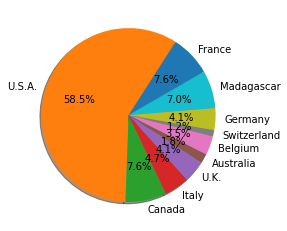

In [15]:
# Test de la función 'muestra_distribucion_por_pais_empresa'
muestra_distribucion_por_pais_empresa(REGISTROS)